In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
train_identity = pd.read_csv('/Users/zhaoruidi/Documents/Kaggle/Data/train_identity.csv')
test_identity = pd.read_csv('/Users/zhaoruidi/Documents/Kaggle/Data/test_identity.csv')
train_transaction = pd.read_csv('/Users/zhaoruidi/Documents/Kaggle/Data/train_transaction.csv')
test_transaction = pd.read_csv('/Users/zhaoruidi/Documents/Kaggle/Data/test_transaction.csv')
# Column名称不一致，处理一下。
test_identity.columns = [i.replace('-', '_') for i in test_identity.columns]

In [3]:
print('train_identity shape:',train_identity.shape)
print('test_identity shape:',test_identity.shape)
train_identity.head()
# 0 - 144232是train
# 144233开始是test

train_identity shape: (144233, 41)
test_identity shape: (141907, 41)


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [4]:
print('train_transaction shape:', train_transaction.shape)
print('test_transaction shape:', test_transaction.shape)
train_transaction.head()
# 0 - 590539 是 train
# 590540 开始是 test

train_transaction shape: (590540, 394)
test_transaction shape: (506691, 393)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Combine Train and Test

In [5]:
set(train_transaction.drop('isFraud',axis = 1).columns) == set(test_transaction.columns)
# OK 首先transaction的column没问题

True

In [6]:
set(train_identity.columns) == set(test_identity.columns)
# OK这下train/test的column name一样了

True

In [7]:
transaction = train_transaction.append(test_transaction, ignore_index=True)
print(transaction.shape)
transaction

(1097231, 394)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0.0,86400,68.500,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0.0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0.0,86469,59.000,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0.0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0.0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097226,4170235,NaN,34214279,94.679,C,13832,375.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1097227,4170236,NaN,34214287,12.173,C,3154,408.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1097228,4170237,NaN,34214326,49.000,W,16661,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1097229,4170238,NaN,34214337,202.000,W,16621,516.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
identity = train_identity.append(test_identity, ignore_index=True)
print(identity.shape)
identity

(286140, 41)


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286135,4170230,-20.0,473365.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 71.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-J700M
286136,4170233,-5.0,489917.0,0.0,0.0,-4.0,-32.0,NaN,NaN,0.0,...,chrome 71.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-J320M
286137,4170234,-5.0,110081.0,NaN,NaN,22.0,-31.0,NaN,NaN,NaN,...,mobile safari 10.0,32.0,1334x750,match_status:2,T,F,F,T,mobile,iOS Device
286138,4170236,-45.0,266704.0,NaN,NaN,-3.0,-10.0,NaN,NaN,NaN,...,chrome 43.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,ALE-L23 Build/HuaweiALE-L23


In [9]:
transaction_x = transaction.drop('isFraud', axis = 1)
transaction_y = transaction['isFraud']

In [10]:
# What we have now:
# - transaction_x
# - transaction_y
# - identity

# EDA of Transaction

In [11]:
train_transaction['isFraud'].value_counts()/train_transaction.shape[0] * 100
# 3.5% of train_transaction is fraud

0    96.500999
1     3.499001
Name: isFraud, dtype: float64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

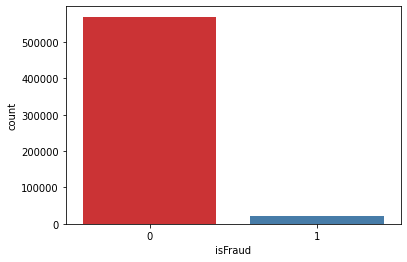

In [12]:
sns.countplot(train_transaction['isFraud'],palette="Set1")

## Missingness

In [13]:
# 没有缺失值的columns
transaction_x.isnull().sum()[transaction_x.isnull().sum() == 0]

TransactionID     0
TransactionDT     0
TransactionAmt    0
ProductCD         0
card1             0
dtype: int64

In [14]:
missing = (transaction_x.isnull().sum()/transaction_x.shape[0] * 100).to_frame()
missing.columns = ['% Missing']
missing = missing[missing['% Missing'] != 0]
missing


,% Missing
card2,1.602853
card3,0.416230
card4,0.424979
card5,0.802566
card6,0.417232
...,...
V335,85.528845
V336,85.528845
V337,85.528845
V338,85.528845


In [15]:
missing[missing['% Missing'] < 10]

,% Missing
card2,1.602853
card3,0.416230
card4,0.424979
card5,0.802566
card6,0.417232
...,...
V317,0.001367
V318,0.001367
V319,0.001367
V320,0.001367


- card2 - card6
- addr1&2
- dist1&2
- P/R emaildomain
- C1 - C14
- D1 - D15
- M1 - M9
- V1 - V339
<br>
一共388个missing variables

### `TransactionDT`

In [16]:
transaction_x[['TransactionDT']]
# 单位是seconds
# 86400 = 60 * 60 * 24，也就是一天的秒数
# 之后的数和86400的差就是过去的秒数


,TransactionDT
0,86400
1,86401
2,86469
3,86499
4,86506
...,...
1097226,34214279
1097227,34214287
1097228,34214326
1097229,34214337


In [17]:
import datetime

START_DATE = '2017-12-01'
startdate = datetime.datetime.strptime(START_DATE, '%Y-%m-%d')
transaction_x['Date'] = transaction_x['TransactionDT'].apply(lambda x: startdate + datetime.timedelta(seconds = x))

transaction_x['Weekdays'] = transaction_x['Date'].dt.dayofweek
transaction_x['Hours'] = transaction_x['Date'].dt.hour
transaction_x['Days'] = transaction_x['Date'].dt.day

In [18]:
START_DATE = '2017-12-01'
startdate = datetime.datetime.strptime(START_DATE, '%Y-%m-%d')
train_transaction['Date'] = train_transaction['TransactionDT'].apply(lambda x: startdate + datetime.timedelta(seconds = x))

train_transaction['Weekdays'] = train_transaction['Date'].dt.dayofweek
train_transaction['Hours'] = train_transaction['Date'].dt.hour
train_transaction['Days'] = train_transaction['Date'].dt.day

In [19]:
train_transaction.groupby(['Hours'])['isFraud'].mean()
# 还是有差别的，早上7点的比例要高一点？

Hours
0     0.031380
1     0.031314
2     0.037483
3     0.038314
4     0.051890
5     0.070302
6     0.077743
7     0.106102
8     0.093014
9     0.089956
10    0.053212
11    0.038816
12    0.030439
13    0.022889
14    0.024216
15    0.025399
16    0.029511
17    0.031530
18    0.035231
19    0.034738
20    0.034273
21    0.034005
22    0.032694
23    0.036997
Name: isFraud, dtype: float64

<AxesSubplot:xlabel='Hours', ylabel='count'>

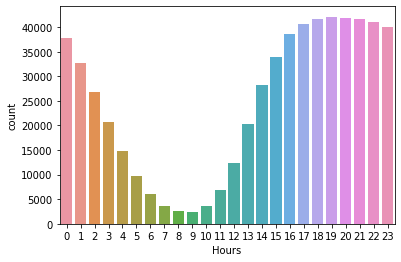

In [20]:
sns.countplot(train_transaction.Hours)

### `TransactionAmt`

In [21]:
transaction_x[['TransactionAmt']]
# Transaction payment amount in USD
# 注意三位数有可能是foreign transaction, trasforming foreign currency to USC

,TransactionAmt
0,68.500
1,29.000
2,59.000
3,50.000
4,50.000
...,...
1097226,94.679
1097227,12.173
1097228,49.000
1097229,202.000


In [22]:
# 没有missing value
transaction_x[['TransactionAmt']].isnull().mean()

TransactionAmt    0.0
dtype: float64

In [23]:
transaction_x[['TransactionAmt']].describe()

,TransactionAmt
count,1.097231e+06
mean,1.348879e+02
std,2.422407e+02
min,1.800000e-02
25%,4.200000e+01
50%,6.795000e+01
75%,1.250000e+02
max,3.193739e+04


<AxesSubplot:xlabel='TransactionAmt'>

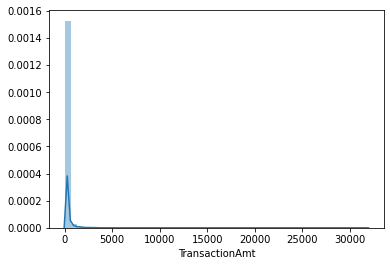

In [24]:
sns.distplot(transaction_x['TransactionAmt'])
# ourlier

In [25]:
np.percentile(transaction_x['TransactionAmt'], 90)

270.0

<AxesSubplot:xlabel='TransactionAmt'>

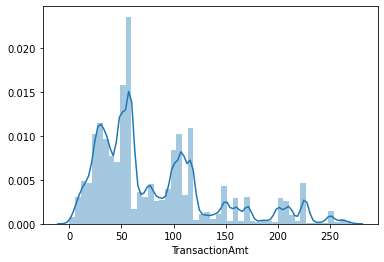

In [26]:
sns.distplot(transaction_x[transaction_x['TransactionAmt'] < 270]['TransactionAmt'])
# 稍微zoom in一下

<AxesSubplot:xlabel='TransactionAmt'>

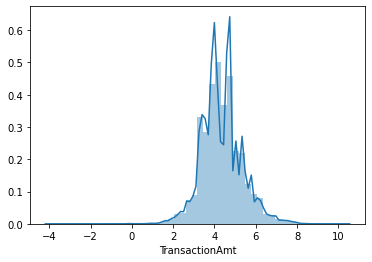

In [27]:
# log transformation
sns.distplot(np.log(transaction_x['TransactionAmt']))
# approximate normal?

Fraud Average TransactionAmt: 149.24477858974976
count    20663.000000
mean       149.244779
std        232.212163
min          0.292000
25%         35.044000
50%         75.000000
75%        161.000000
max       5191.000000
Name: TransactionAmt, dtype: float64


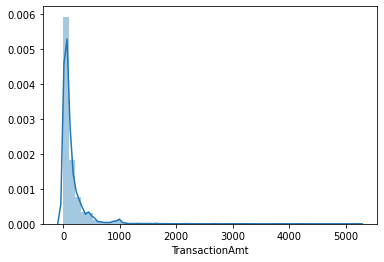

In [28]:
sns.distplot(train_transaction[train_transaction['isFraud'] == 1]['TransactionAmt'])
print('Fraud Average TransactionAmt:', train_transaction[train_transaction['isFraud'] == 1]['TransactionAmt'].mean())
print(train_transaction[train_transaction['isFraud'] == 1]['TransactionAmt'].describe())

Not Fraud Average TransactionAmt: 134.51166457849672


count    569877.000000
mean        134.511665
std         239.395078
min           0.251000
25%          43.970000
50%          68.500000
75%         120.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

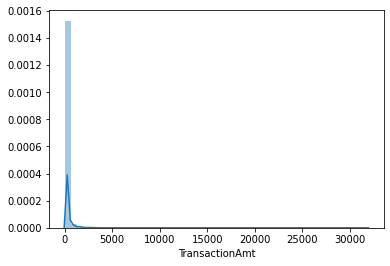

In [29]:
sns.distplot(train_transaction[train_transaction['isFraud'] == 0]['TransactionAmt'])
print('Not Fraud Average TransactionAmt:', train_transaction[train_transaction['isFraud'] == 0]['TransactionAmt'].mean())
train_transaction[train_transaction['isFraud'] == 0]['TransactionAmt'].describe()

In [30]:
transaction_x['TransactionAmt'].skew()

11.593654165082489

In [31]:
std = transaction_x['TransactionAmt'].std()
mean = transaction_x['TransactionAmt'].mean()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std
num_outliers = transaction_x[(transaction_x['TransactionAmt'] < lower_bound) | (transaction_x['TransactionAmt'] > upper_bound)].shape[0]
print('There are {} outliers'.format(str(num_outliers)))
print('There are {} observations'.format(str(transaction_x.shape[0])))
print('Percentage of outliers is:', str(num_outliers/transaction_x.shape[0] * 100))

There are 18324 outliers
There are 1097231 observations
Percentage of outliers is: 1.6700220828613117


In [32]:
# Fraud 的平均金额应该要被 not Fraud高一点，但是又不会是特别高，会被怀疑？

### `ProductCD`

In [33]:
transaction_x[['ProductCD']]
# The product code for each transaction
# 不一定是一个真的product，有可能是一种service

,ProductCD
0,W
1,W
2,W
3,W
4,H
...,...
1097226,C
1097227,C
1097228,W
1097229,W


In [34]:
# No missingness
transaction_x[['ProductCD']].isnull().mean()

ProductCD    0.0
dtype: float64

In [35]:
transaction_x['ProductCD'].unique()

array(['W', 'H', 'C', 'S', 'R'], dtype=object)

<AxesSubplot:xlabel='ProductCD'>

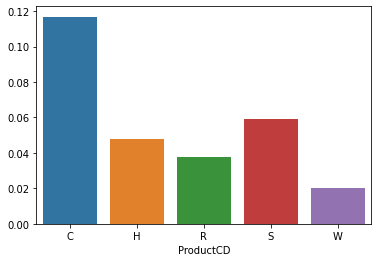

In [36]:
ProductCD_Fraud = train_transaction.groupby(['ProductCD'])['isFraud'].mean()
sns.barplot(ProductCD_Fraud.index, ProductCD_Fraud.values)

# C很大比例.. 应该是和product type有关系的

In [37]:
train_transaction['ProductCD'].value_counts()
# w 是最多的
# C 第二多但是很多fraud

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

<AxesSubplot:xlabel='ProductCD', ylabel='count'>

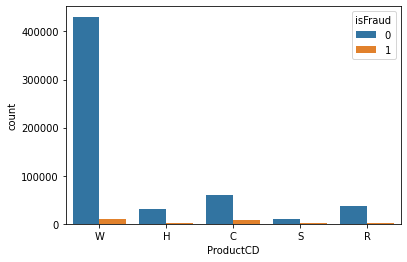

In [38]:
sns.countplot(x = 'ProductCD', hue = 'isFraud', data = train_transaction)

<AxesSubplot:xlabel='ProductCD', ylabel='TransactionAmt'>

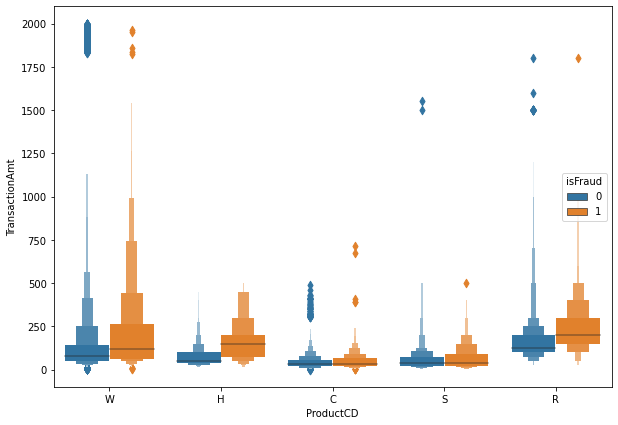

In [39]:
plt.figure(figsize=(10,7))   
sns.boxenplot(x = 'ProductCD', y = 'TransactionAmt', hue = 'isFraud', 
              data = train_transaction[train_transaction['TransactionAmt'] <= 2000])
# W/H/R, the distribution of Fraud Amt is slightly higher than that of not Fraud Amt

### `Card1` - `Card6`

In [40]:
card = transaction_x[['card1', 'card2', 'card3', 'card4', 'card5', 'card6']]
card.head()

# card1 17091个unique value，所以肯定不是卡号
# card2 100 - 600
# card3 应该是国家，150可能是美国所以很多都是150？
# card4 是 issue bank
# card5 不知道...
# card6 是 card category

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


In [41]:
card.isnull().mean()

card1    0.000000
card2    0.016029
card3    0.004162
card4    0.004250
card5    0.008026
card6    0.004172
dtype: float64

#### `card1`

In [42]:
card['card1'].nunique()

17091

In [43]:
card['card1'].describe()

count    1.097231e+06
mean     9.925744e+03
std      4.893776e+03
min      1.000000e+03
25%      6.019000e+03
50%      9.749000e+03
75%      1.424750e+04
max      1.839700e+04
Name: card1, dtype: float64

<AxesSubplot:xlabel='card1'>

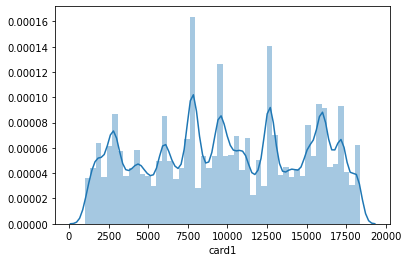

In [44]:
sns.distplot(card['card1'])

#### `card2` 

In [45]:
card['card2'].nunique()

501

In [46]:
card['card2'].describe()
# 100 - 600?

count    1.079644e+06
mean     3.630998e+02
std      1.582079e+02
min      1.000000e+02
25%      2.100000e+02
50%      3.610000e+02
75%      5.120000e+02
max      6.000000e+02
Name: card2, dtype: float64

<AxesSubplot:xlabel='card2'>

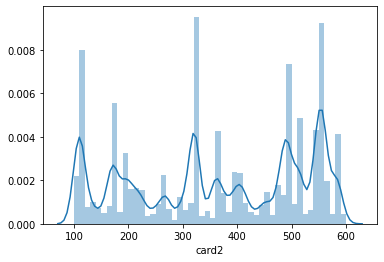

In [47]:
sns.distplot(card['card2'])

#### `card3`

In [48]:
(card['card3'].value_counts()/card.shape[0] * 100).to_frame().sort_values('card3', ascending = False).head()
# mostly 150
# then 185

,card3
150.0,87.205429
185.0,10.021591
106.0,0.322904
117.0,0.258925
144.0,0.239968


#### `card4`

In [49]:
train_transaction.groupby(['card4'])['isFraud'].mean()

card4
american express    0.028698
discover            0.077282
mastercard          0.034331
visa                0.034756
Name: isFraud, dtype: float64

In [50]:
train_transaction['card4'].value_counts()

visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

<AxesSubplot:xlabel='card4', ylabel='count'>

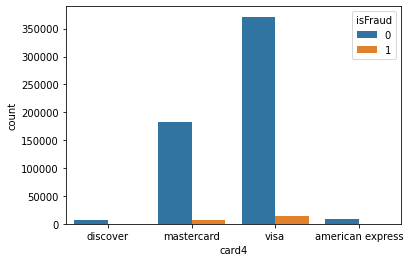

In [51]:
sns.countplot(data = train_transaction, hue = 'isFraud', x = 'card4')

<AxesSubplot:xlabel='card4', ylabel='TransactionAmt'>

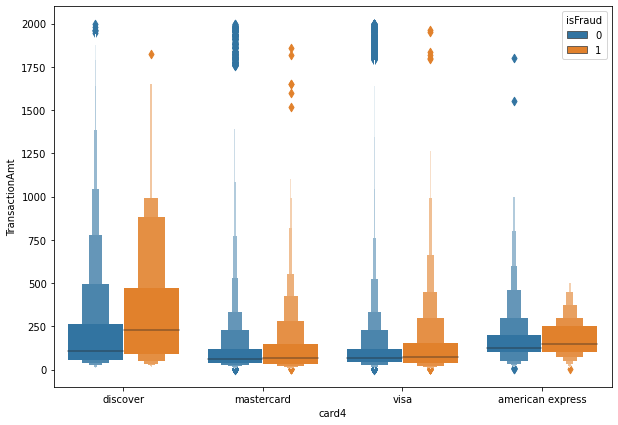

In [52]:
plt.figure(figsize=(10,7))   
sns.boxenplot(x = 'card4', y = 'TransactionAmt', hue = 'isFraud',
                 data = train_transaction[train_transaction['TransactionAmt'] <= 2000])

#### `card5`

In [53]:
card['card5'].value_counts()/card.shape[0] * 100

226.0    50.448538
224.0    13.954126
166.0     9.380887
102.0     4.510536
117.0     4.289069
           ...    
221.0     0.000091
175.0     0.000091
208.0     0.000091
124.0     0.000091
209.0     0.000091
Name: card5, Length: 138, dtype: float64

#### `card6`

<AxesSubplot:xlabel='card6', ylabel='count'>

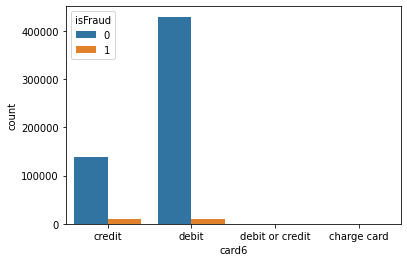

In [54]:
sns.countplot(data = train_transaction, hue = 'isFraud', x = 'card6')

In [55]:
train_transaction['card6'].value_counts()

debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64

In [56]:
train_transaction.groupby('card6')['isFraud'].mean()
# credit fraud的概率高一点

card6
charge card        0.000000
credit             0.066785
debit              0.024263
debit or credit    0.000000
Name: isFraud, dtype: float64

### `addr1` and `addr2`

In [57]:
addr = transaction_x[['addr1', 'addr2']]
addr.head()

,addr1,addr2
0,315.0,87.0
1,325.0,87.0
2,330.0,87.0
3,476.0,87.0
4,420.0,87.0


In [58]:
# Categorical feature
# *both addresses are for purchaser
# addr1 as billing region
# addr2 as billing country

In [59]:
# 先把count <= 50的算成others，然后再看一下distribution

In [60]:
to_replace = transaction_x['addr1'].value_counts()[transaction_x['addr1'].value_counts() <=50].index
transaction_x['addr1'].replace(to_replace, 'other', inplace = True)

to_replace = transaction_x['addr2'].value_counts()[transaction_x['addr2'].value_counts() <=50].index
transaction_x['addr2'].replace(to_replace, 'other', inplace = True)

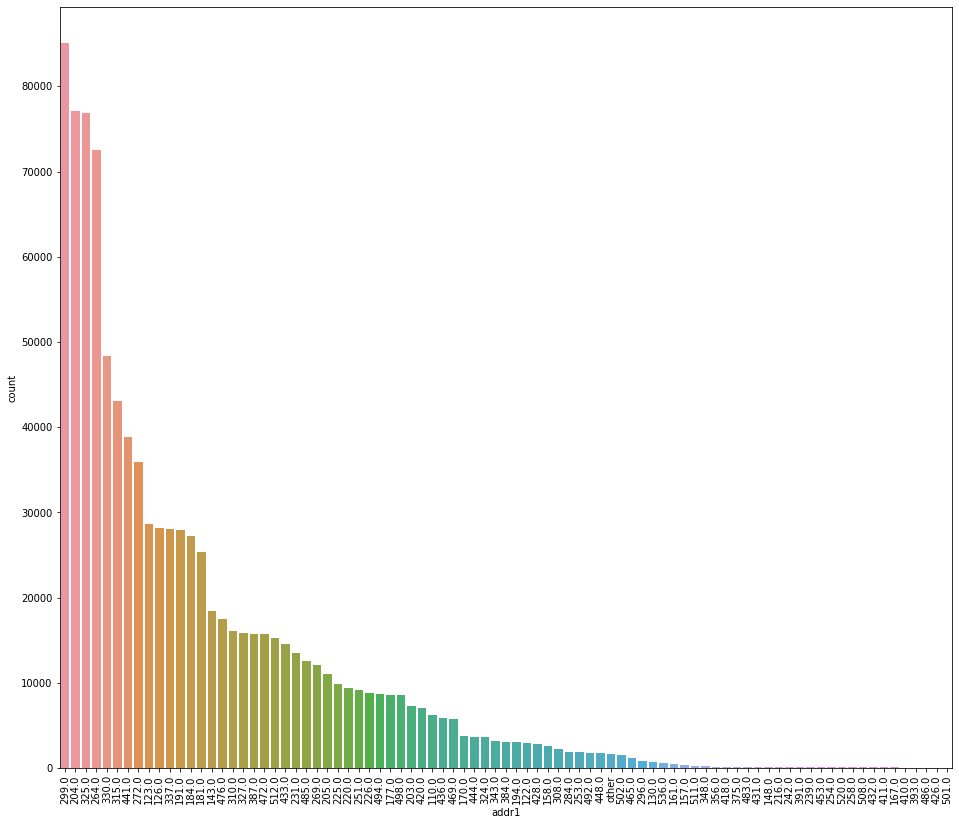

In [61]:
fig = plt.figure(figsize=(16,14))   
sns.countplot(transaction_x['addr1'], order = transaction_x['addr1'].value_counts().index)
adjust = plt.xticks(rotation='vertical')

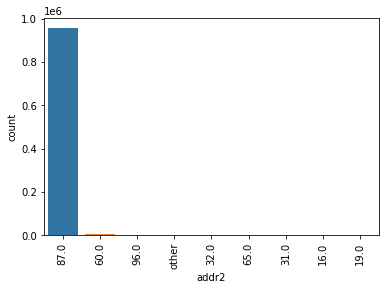

In [62]:
sns.countplot(transaction_x['addr2'], order = transaction_x['addr2'].value_counts().index)
adjust = plt.xticks(rotation='vertical')
# mostly 87
# 87很有可能就是美国

### `dist1` and `dist2`

In [63]:
dist = transaction_x[['dist1', 'dist2']]

In [64]:
dist.head()

,dist1,dist2
0,19.0,NaN
1,NaN,NaN
2,287.0,NaN
3,NaN,NaN
4,NaN,NaN


In [65]:
# distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.

### `P_emaildomain` and `R_emaildomain`

In [66]:
emaildomain = transaction_x[['P_emaildomain', 'R_emaildomain']]
emaildomain.head()

,P_emaildomain,R_emaildomain
0,NaN,NaN
1,gmail.com,NaN
2,outlook.com,NaN
3,yahoo.com,NaN
4,gmail.com,NaN


In [67]:
# 这个很好理解
# P就是purchaser的email
# R就是recipient的email

# certain transactions don't need recipient, so R_emaildomain is null,所以和交易类型有关系？

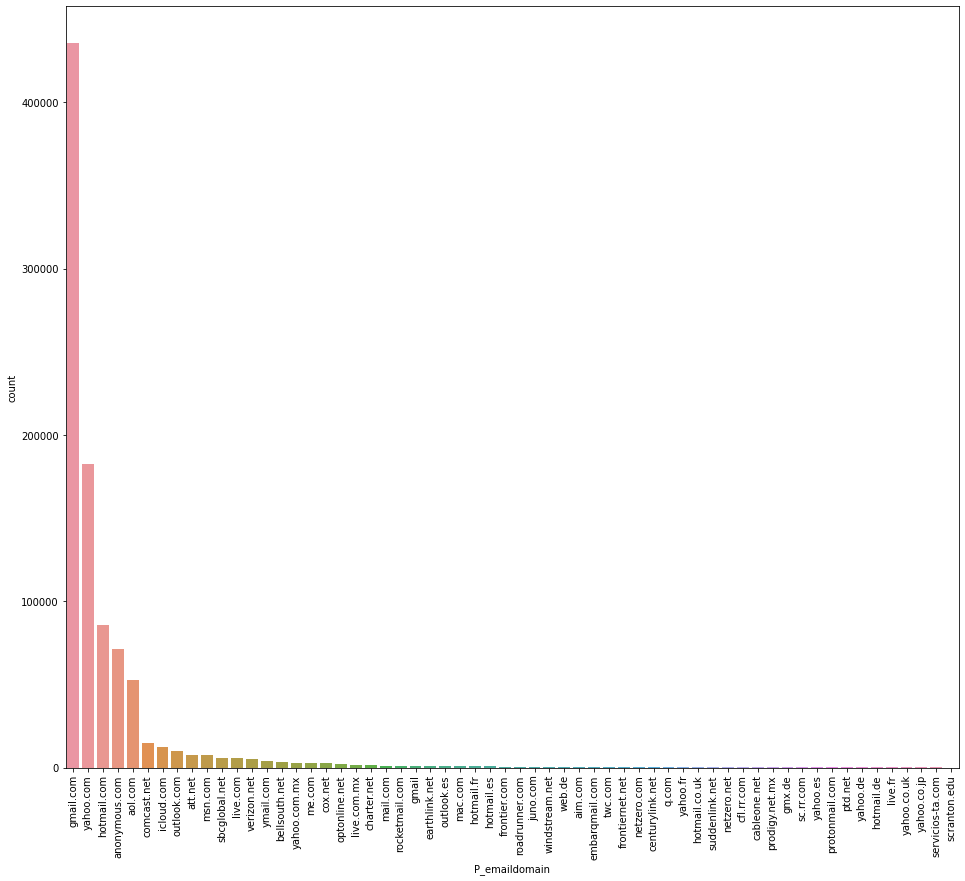

In [107]:
fig = plt.figure(figsize=(16,14))   
sns.countplot(transaction_x['P_emaildomain'], order = transaction_x['P_emaildomain'].value_counts().index)
adjust = plt.xticks(rotation='vertical')

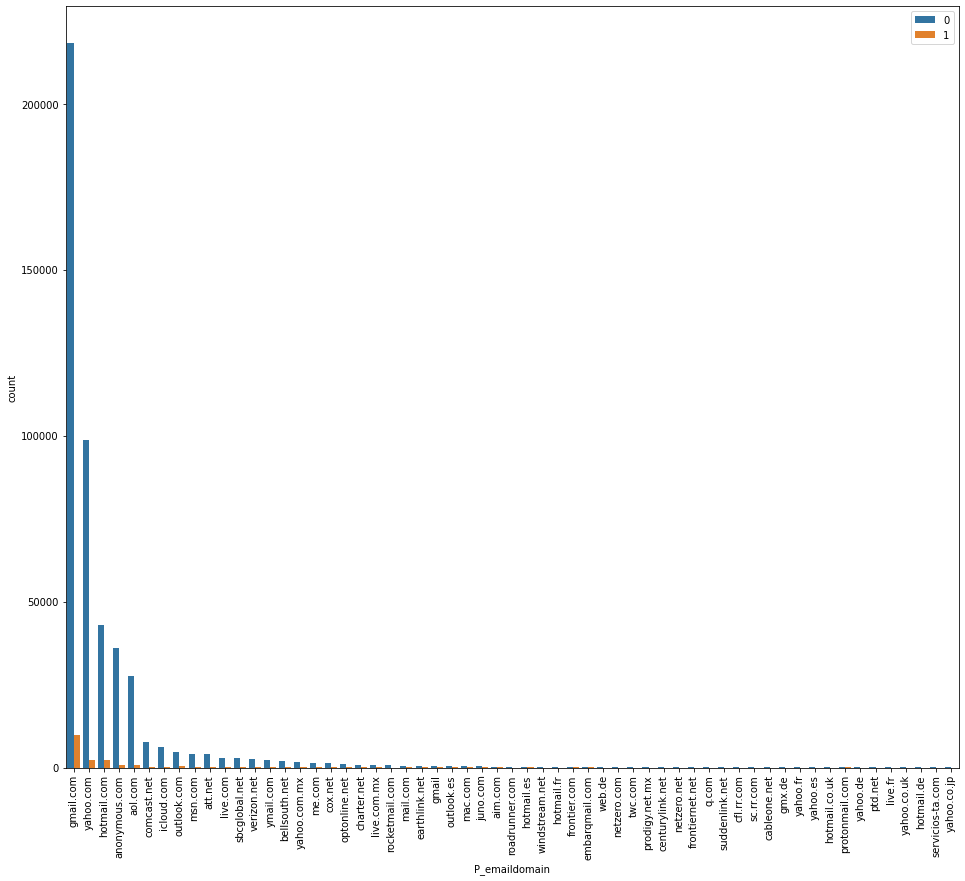

In [111]:
fig = plt.figure(figsize=(16,14))   
sns.countplot(x = 'P_emaildomain',data = train_transaction, hue = 'isFraud',order = train_transaction['P_emaildomain'].value_counts().index)
adjust = plt.xticks(rotation='vertical')
plt.legend(loc = 1)

### `C1` to `C14`

In [70]:
# Counting
# Such as how many addresses are found to be associated with the payment card, etc.
# The actual meaning is masked??? why???????

In [71]:
C_col = ['C' + str(i) for i in range(1, 15) ]

In [72]:
C = transaction_x[C_col]
C

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097226,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1097227,1.0,3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,3.0,1.0
1097228,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
1097229,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


In [73]:
C.describe()
# outlier?
# 75% 都是个位数,但是max竟然是e3

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,1.097228e+06,1.097228e+06,1.097228e+06,1.097228e+06,1.097228e+06,1.097228e+06,1.097228e+06,1.097228e+06,1.097228e+06,1.097228e+06,1.097228e+06,1.097228e+06,1.092483e+06,1.097228e+06
mean,1.224565e+01,1.316624e+01,1.569227e-02,3.304229e+00,5.290377e+00,8.047716e+00,2.308044e+00,3.643492e+00,4.541059e+00,3.656317e+00,8.968402e+00,3.417374e+00,3.036952e+01,7.274049e+00
std,1.118594e+02,1.285684e+02,1.904406e-01,5.800246e+01,2.563929e+01,6.135191e+01,5.209126e+01,7.231599e+01,1.894261e+01,7.196617e+01,8.079689e+01,7.340473e+01,1.172570e+02,4.114092e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
50%,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00
75%,3.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.300000e+01,2.000000e+00
max,4.685000e+03,5.691000e+03,3.100000e+01,2.253000e+03,3.760000e+02,2.253000e+03,2.255000e+03,3.331000e+03,5.720000e+02,3.257000e+03,3.188000e+03,3.188000e+03,2.918000e+03,1.429000e+03


In [74]:
C.isnull().sum()

C1        3
C2        3
C3        3
C4        3
C5        3
C6        3
C7        3
C8        3
C9        3
C10       3
C11       3
C12       3
C13    4748
C14       3
dtype: int64

In [75]:
C[C.C1.isnull()]
# 所以只有3个record是真的什么都没有
# 剩下的missing都是C13没有

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
959453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
C.loc[(C.isnull().sum(axis = 1) != 0).values]

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
727676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
727679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
727680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
727681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
727682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1064531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1064532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1064534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


#### `C1`

In [131]:
to_replace = C['C1'].value_counts()[C['C1'].value_counts() <= 400].index.tolist()
C['C1'].replace(to_replace, 'other', inplace = True)
# 出现次数少于400的变成other

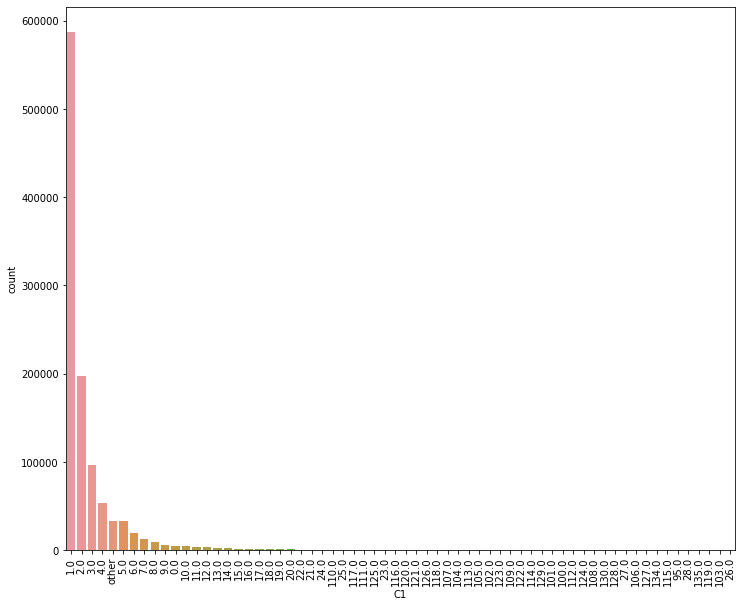

In [132]:
plt.figure(figsize = (12, 10))
sns.countplot(C['C1'], order = C['C1'].value_counts().index)
adjust = plt.xticks(rotation='vertical')

### `D1` to `D15` 

In [77]:
D_col = ['D' + str(i) for i in range(1, 16)]
D = transaction_x[D_col]
D

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0
1,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
2,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0
3,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097226,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
1097227,16.0,16.0,16.0,16.0,16.0,16.0,16.0,NaN,NaN,0.0,NaN,16.0,0.0,0.0,16.0
1097228,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
1097229,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0


In [78]:
# Many missing value

### `M1` to `M9`

In [79]:
# Match, such as names on card and address

In [80]:
M_col = ['M' + str(i) for i in range(1, 10)]
M = transaction_x[M_col]
M

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,T,T,T,M2,F,T,NaN,NaN,NaN
1,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,T,T,T,M0,F,F,F,F,F
3,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1097226,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN
1097227,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN
1097228,T,T,T,M0,F,F,F,T,T
1097229,T,T,T,M0,F,F,F,F,F


### `V1` to `V339`

In [81]:
V_col = ['V' + str(i) for i in range(1, 340)]
V = transaction_x[V_col]
V

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1097227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1097228,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1097229,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
V.isnull().mean()
# 真的好多missingness!!

V1      0.415414
V2      0.415414
V3      0.415414
V4      0.415414
V5      0.415414
          ...   
V335    0.855288
V336    0.855288
V337    0.855288
V338    0.855288
V339    0.855288
Length: 339, dtype: float64

# EDA of Identity

In [83]:
# Missingness
identity.isnull().sum()[identity.isnull().sum() == 0]

TransactionID    0
id_01            0
id_12            0
dtype: int64

In [84]:
# 在这之前先left join一下
# merge 和 join 的区别是什么啊？

In [85]:
train_identity_wFraud = train_identity.copy(deep = True)

In [86]:
train_identity_wFraud = train_identity_wFraud.merge(train_transaction[['TransactionID','isFraud']], how = 'left', on = 'TransactionID')
train_identity_wFraud

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,0
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device,0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,F,F,T,T,desktop,Windows,0
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,F,F,T,T,desktop,NaN,0
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97,0
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,...,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F,1
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,...,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152,0
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,...,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS,0


### `DeviceType`

In [87]:
identity[['DeviceType']]

,DeviceType
0,mobile
1,mobile
2,desktop
3,desktop
4,desktop
...,...
286135,mobile
286136,mobile
286137,mobile
286138,mobile


In [88]:
identity['DeviceType'].unique()

array(['mobile', 'desktop', nan], dtype=object)

In [89]:
identity['DeviceType'].isnull().mean()

0.0293527643810722

In [90]:
identity['DeviceType'].isnull().sum()

8399

In [91]:
identity['DeviceType'].value_counts()

desktop    159568
mobile     118173
Name: DeviceType, dtype: int64

In [92]:
# DeviceType and isFraud
train_identity_wFraud.groupby(['DeviceType'])['isFraud'].mean()
# 应该是mobile的概率大一点？

DeviceType
desktop    0.065215
mobile     0.101662
Name: isFraud, dtype: float64

### `DeviceInfo`

In [93]:
identity['DeviceInfo']

0         SAMSUNG SM-G892A Build/NRD90M
1                            iOS Device
2                               Windows
3                                   NaN
4                                 MacOS
                      ...              
286135                         SM-J700M
286136                         SM-J320M
286137                       iOS Device
286138      ALE-L23 Build/HuaweiALE-L23
286139                          SAMSUNG
Name: DeviceInfo, Length: 286140, dtype: object

In [94]:
identity['DeviceInfo'].nunique()

2799

In [95]:
identity['DeviceInfo'].unique()

array(['SAMSUNG SM-G892A Build/NRD90M', 'iOS Device', 'Windows', ...,
       'Azumi_IRO_A5_Q', 'KYOCERA-C6742A', 'Alcatel_5098O'], dtype=object)

In [96]:
train_identity_wFraud[train_identity_wFraud['DeviceInfo'] == 'Windows']['isFraud'].mean()

0.06539960605171619

In [97]:
train_identity_wFraud[train_identity_wFraud['DeviceInfo'] == 'iOS Device']['isFraud'].mean()

0.06268324739662319

In [98]:
# 有没有可能是特定的型号是fraud，因为比较容易被黑客入侵？

### `id01` to `id38`

In [99]:
# 注意 id12 - id38 是 categorical feature

In [100]:
id_col = ['id_' + str(i).zfill(2) for i in range(1, 39)]

In [101]:
ids = identity[id_col]
ids

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
0,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T
1,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,...,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T
2,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T
3,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,...,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T
4,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,...,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286135,-20.0,473365.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NotFound,NaN,chrome 71.0 for android,NaN,NaN,NaN,F,F,T,F
286136,-5.0,489917.0,0.0,0.0,-4.0,-32.0,NaN,NaN,0.0,0.0,...,Found,NaN,chrome 71.0 for android,NaN,NaN,NaN,F,F,T,F
286137,-5.0,110081.0,NaN,NaN,22.0,-31.0,NaN,NaN,NaN,NaN,...,NotFound,iOS 10.3.3,mobile safari 10.0,32.0,1334x750,match_status:2,T,F,F,T
286138,-45.0,266704.0,NaN,NaN,-3.0,-10.0,NaN,NaN,NaN,NaN,...,NotFound,NaN,chrome 43.0 for android,NaN,NaN,NaN,F,F,T,F


In [102]:
ids.isnull().mean()

id_01    0.000000
id_02    0.028979
id_03    0.535874
id_04    0.535874
id_05    0.050762
id_06    0.050762
id_07    0.964304
id_08    0.964304
id_09    0.478353
id_10    0.478353
id_11    0.029300
id_12    0.000000
id_13    0.099720
id_14    0.470885
id_15    0.028580
id_16    0.108524
id_17    0.037761
id_18    0.664542
id_19    0.038149
id_20    0.039302
id_21    0.964290
id_22    0.964245
id_23    0.964245
id_24    0.966845
id_25    0.964454
id_26    0.964318
id_27    0.964245
id_28    0.029300
id_29    0.029300
id_30    0.481988
id_31    0.032267
id_32    0.481873
id_33    0.496890
id_34    0.475851
id_35    0.028580
id_36    0.028580
id_37    0.028580
id_38    0.028580
dtype: float64

In [103]:
# OK 这个很明显了是操作系统，有电脑的也有手机的
ids['id_30'].unique()

array(['Android 7.0', 'iOS 11.1.2', nan, 'Mac OS X 10_11_6', 'Windows 10',
       'Android', 'Linux', 'iOS 11.0.3', 'Mac OS X 10_7_5',
       'Mac OS X 10_12_6', 'Mac OS X 10_13_1', 'iOS 11.1.0',
       'Mac OS X 10_9_5', 'Windows 7', 'Windows 8.1', 'Mac', 'iOS 10.3.3',
       'Mac OS X 10.12', 'Mac OS X 10_10_5', 'Mac OS X 10_11_5',
       'iOS 9.3.5', 'Android 5.1.1', 'Android 7.1.1', 'Android 6.0',
       'iOS 10.3.1', 'Mac OS X 10.9', 'iOS 11.1.1', 'Windows Vista',
       'iOS 10.3.2', 'iOS 11.0.2', 'Mac OS X 10.11', 'Android 8.0.0',
       'iOS 10.2.0', 'iOS 10.2.1', 'iOS 11.0.0', 'Mac OS X 10.10',
       'Mac OS X 10_12_3', 'Mac OS X 10_12', 'Android 6.0.1', 'iOS',
       'Mac OS X 10.13', 'Mac OS X 10_12_5', 'Mac OS X 10_8_5',
       'iOS 11.0.1', 'iOS 10.0.2', 'Android 5.0.2', 'Windows XP',
       'iOS 11.2.0', 'Mac OS X 10.6', 'Windows 8', 'Mac OS X 10_6_8',
       'Mac OS X 10_11_4', 'Mac OS X 10_12_1', 'iOS 10.1.1',
       'Mac OS X 10_11_3', 'Mac OS X 10_12_4', 'Mac OS X 10

In [104]:
ids['id_31'].unique()
# 这个是浏览器
# 可以拆分成：系统 + version

array(['samsung browser 6.2', 'mobile safari 11.0', 'chrome 62.0', nan,
       'chrome 62.0 for android', 'edge 15.0', 'mobile safari generic',
       'chrome 49.0', 'chrome 61.0', 'edge 16.0', 'safari generic',
       'edge 14.0', 'chrome 56.0 for android', 'firefox 57.0',
       'chrome 54.0 for android', 'mobile safari uiwebview', 'chrome',
       'chrome 62.0 for ios', 'firefox', 'chrome 60.0 for android',
       'mobile safari 10.0', 'chrome 61.0 for android',
       'ie 11.0 for desktop', 'ie 11.0 for tablet', 'mobile safari 9.0',
       'chrome generic', 'other', 'chrome 59.0 for android',
       'firefox 56.0', 'android webview 4.0', 'chrome 55.0', 'opera 49.0',
       'ie', 'chrome 55.0 for android', 'firefox 52.0',
       'chrome 57.0 for android', 'chrome 56.0',
       'chrome 46.0 for android', 'chrome 58.0', 'firefox 48.0',
       'chrome 59.0', 'samsung browser 4.0', 'edge 13.0',
       'chrome 53.0 for android', 'chrome 58.0 for android',
       'chrome 60.0', 'mobile sa